# Calculating temporal variance with and without seasonal cycle

In [1]:
using ESDL
using ESDLPlots

WebIO._IJuliaInit()

   A Cube is defined via its path and a view of the data is created.

In [7]:
c     = esdc() #Cube()
cdata = subsetcube(c, variable="gross_primary_productivity", lat=(30,65), lon=(-15,40))

YAXArray with the following dimensions
lon                 Axis with 220 Elements from -14.875 to 39.875
lat                 Axis with 140 Elements from 64.875 to 30.125
time                Axis with 1840 Elements from 1979-01-05T00:00:00 to 2018-12-31T00:00:00
units: W m-2
Total size: 216.19 MB


Here we demonstrate how to add a user-defined function to use the DAT's capabilities. First we define the function that has the signature *xin* (input data), *xout* (output data), *maskin* (input mask), *maskout* (output mask). In this case it simply cacluates the variance of a time series. Then we call registerDATFunction, makes the function simply callable thourgh mapCube. 

Here we call the function with our 3D data cube as its argument.

In [8]:
import Statistics: var, mean
v1             = mapslices(var ∘ skipmissing,cdata,dims = "Time")
cube_anomalies = removeMSC(cdata);
v2             = mapslices(var ∘ skipmissing,cube_anomalies,dims = "Time")

Progress: 100%|█████████████████████████████████████████| Time: 0:01:52
Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


YAXArray with the following dimensions
lon                 Axis with 220 Elements from -14.875 to 39.875
lat                 Axis with 140 Elements from 64.875 to 30.125
Total size: 120.31 KB


And show the maps of variances:

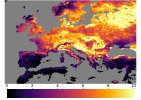

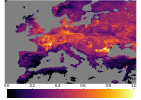

In [9]:
display(plotMAP(v1,dmin=0,dmax=10))
display(plotMAP(v2,dmin=0,dmax=1))

In [10]:
# currently not working

mv1=mapslices(mean ∘ skipmissing, v1, dims = ("lon","lat"));
mv2=mapslices(mean ∘ skipmissing, v2, dims = ("lon","lat"));
println("Mean variance with seasonal cycle: ", mv1.data[1])
println("Mean variance without seasonal cycle: ", mv2.data[1])

LoadError: MethodError: defalg(::Vector{Union{}}) is ambiguous. Candidates:
  defalg(v::AbstractArray{<:Union{Missing, Number}}) in Base.Sort at sort.jl:658
  defalg(::AbstractArray{<:Union{Missing, InlineStrings.String1, InlineStrings.String15, InlineStrings.String3, InlineStrings.String7}}) in InlineStrings at /home/anja/.julia/packages/InlineStrings/aWvyB/src/InlineStrings.jl:698
Possible fix, define
  defalg(::AbstractArray{<:Missing})